In [35]:
import random
import math
import numpy as np
import copy
import getopt
import psycopg2
import sys
import time
import matplotlib.pyplot as plt


In [36]:
eps = ["0.125", "0.25", "0.5", "1","2","4"]
beta = ["0.01", "0.025", "0.05", "0.1", "0.2"]


SS_len_eps = [1366.0368058478382, 417.2280563618702, 132.29173478689344, 42.823793721148434, 20.078181003132507, 8.220990293120598]
SS_err_eps = [742.4196172409606, 217.89814926595307, 67.85755859747405, 23.780088687140392, 13.684941208629994, 5.558100383540705]
SS_len_beta = [122.42059264361656, 82.42777981737379, 59.86095299141979, 44.49374722208527, 32.30982456466762]
SS_err_beta = [62.21634881998182, 41.32215808993442, 31.16373003694997, 26.992982706338125, 20.89167227178939]
SVT_len_eps = [104.66, 53.045, 27.42, 14.2, 7.17, 3.49]
SVT_err_eps = [4.0, 2.0, 1.0, 1.0, 1.0, 0.0]

SS_adult_len = [104500.32157916682, 31361.001125639137, 9307.377131687417, 3034.791203584908, 1020.1617359274985, 373.822815393218]
SS_adult_err = [48650.598949362306, 17245.829206519556, 6551.269038561266, 2031.979859488696, 587.099356349645, 205.39453137293458]
SVT_adult_len = [9495.645, 4646.41, 2451.91, 1280.515, 628.115, 312.015]
SVT_adult_err = [733.0, 341.0, 175.0, 105.0, 55.0, 24.0]
EM_adult_len = [7533.59, 3682.765, 1916.94, 1026.62, 482.065, 256.39]
EM_adult_err = [125.0, 89.0, 74.0, 47.0, 31.0, 14.0]


SVT_len_beta = [15.84, 15.13, 14.69, 14.24, 13.69]
SVT_err_beta = [1.0, 1.0, 1.0, 1.0, 1.0]
EM_len_eps = [91.27, 46.59, 23.545, 12.075, 5.51, 3.28]
EM_err_eps = [3.0, 1.0, 1.0, 1.0, 1.0, 1.0]
EM_len_beta = [12.91, 12.01, 11.555, 11.28, 10.52]
EM_err_beta = [1.0, 1.0, 1.0, 1.0, 1.0]

SS_adult_len_b = [8193.00714748021, 5718.378704640575, 4286.4565613012655, 3075.5718691935635, 2210.01498664275]
SS_adult_err_b = [3881.8658616715693, 3237.7940319238987, 2706.445757813868, 1681.4147261963517, 1573.215812101931]
SVT_adult_len_b = [1329.105, 1293.395, 1270.24, 1239.525, 1223.01]
SVT_adult_err_b = [169.0, 110.0, 102.0, 81.0, 64.0]
EM_adult_len_b = [1162.28, 1114.61, 1078.4, 1024.85, 979.435]
EM_adult_err_b = [94.0, 73.0, 65.0, 47.0, 37.0]

In [37]:
#varying eps
SVT_len_uni = [2210.88, 1088.43, 539.045, 267.815, 134.8, 69.335]
SVT_err_uni = [146.0, 77.0, 40.0, 22.0, 7.0, 4.0]
EM_len_uni = [1802.92, 881.985, 442.295, 222.17, 110.44, 57.755]
EM_err_uni = [37.0, 22.0, 8.0, 5.0, 2.0, 1.0]
SS_len_uni = [25012.943757722092, 6503.934026423517, 1845.093874313065, 573.1005820046819, 132.87197547073612, 39.265022684850116]
SS_err_uni = [15575.589640009071, 4309.46870443521, 948.7338278955467, 345.99537797889207, 76.39352635856267, 19.68730768745445]



SVT_len_norm = [275.795, 134.06, 64.975, 32.775, 16.615, 9.495]
SVT_err_norm = [16.0, 6.0, 3.0, 2.0, 1.0, 1.0]
EM_len_norm = [220.29, 110.245, 51.695, 26.45, 13.9, 7.505]
EM_err_norm = [6.0, 2.0, 1.0, 1.0, 1.0, 1.0]
SS_len_norm = [3209.4954949548696, 978.2441386929187, 287.65368667753404, 90.83257771106987, 29.85331961031193, 9.129890763143113]
SS_err_norm = [2146.019647982299, 579.4031385573871, 155.4906160395003, 48.09590392887185, 15.568191377213225, 4.555464926066634]

In [38]:
#varying beta
SVT_len_uni_b = [254.72, 246.01, 239.98, 232.145, 225.92]
SVT_err_uni_b = [18.0, 17.0, 12.0, 12.0, 9.0]
EM_len_uni_b = [212.455, 204.12, 194.905, 188.035, 180.585]
EM_err_uni_b = [7.0, 4.0, 4.0, 3.0, 3.0]
SS_len_uni_b = [1163.5883846302336, 754.6631436981276, 562.9989900245773, 421.05449878036154, 299.94418876595836]
SS_err_uni_b = [517.7019588659459, 374.9494975466514, 309.8232745453315, 264.4942713411583, 188.7098984086624]



SVT_len_norm_b = [36.01, 34.615, 33.84, 32.965, 31.89]
SVT_err_norm_b = [3.0, 2.0, 2.0, 2.0, 2.0]
EM_len_norm_b = [30.02, 28.575, 27.58, 26.505, 25.385]
EM_err_norm_b = [1.0, 1.0, 1.0, 1.0, 1.0]
SS_len_norm_b = [242.20471357679992, 166.99683668140213, 120.15861340720845, 89.25346078800975, 64.8253154328566]
SS_err_norm_b = [79.72833608166911, 59.72510647765739, 66.80590261957332, 48.242855734279146, 37.6372952423626]

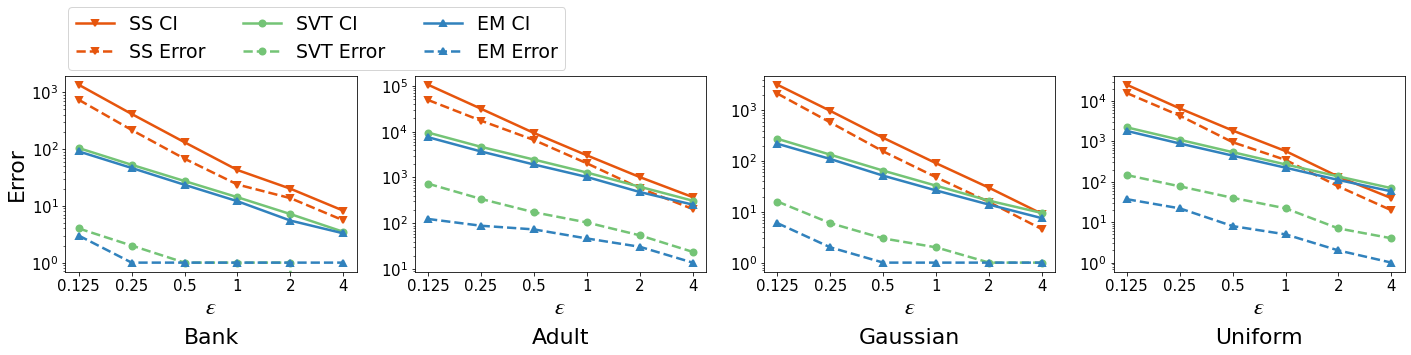

In [42]:
fig, axes = plt.subplots(1,4, figsize=(24, 3.6))


axes[0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0].plot(eps, SS_len_eps,linewidth = 2.5, linestyle = '-',label='SS CI',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))
line2, =axes[0].plot(eps, SS_err_eps,linewidth = 2.5, linestyle = '--',label='SS Error',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

line3, =axes[0].plot(eps, SVT_len_eps,linewidth = 2.5, linestyle = '-',label='SVT CI',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(9),
    markeredgecolor=plt.cm.tab20c(9),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(9))
line4, =axes[0].plot(eps, SVT_err_eps,linewidth = 2.5, linestyle = '--',label='SVT Error',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(9),
    markeredgecolor=plt.cm.tab20c(9),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(9))

line5, =axes[0].plot(eps, EM_len_eps,linewidth = 2.5, linestyle = '-',label='EM CI',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line6, =axes[0].plot(eps, EM_err_eps,linewidth = 2.5, linestyle = '--',label='EM Error',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))


axes[0].set_ylabel('Error',fontsize=22)
axes[0].set_yscale('log')
axes[0].set_xlabel('$𝜀$', fontsize=22)

axes[0].legend(handles=[line1, line2, line3, line4, line5, line6],bbox_to_anchor=(0.75, 0.4, 1, 1),fontsize=19,ncol=3, facecolor="white")

axes[1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1].plot(eps, SS_adult_len,linewidth = 2.5, linestyle = '-',label='SS CI',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))
line2, =axes[1].plot(eps, SS_adult_err,linewidth = 2.5, linestyle = '--',label='SS Error',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

line3, =axes[1].plot(eps, SVT_adult_len,linewidth = 2.5, linestyle = '-',label='SVT CI',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(9),
    markeredgecolor=plt.cm.tab20c(9),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(9))
line4, =axes[1].plot(eps, SVT_adult_err,linewidth = 2.5, linestyle = '--',label='SVT Error',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(9),
    markeredgecolor=plt.cm.tab20c(9),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(9))

line5, =axes[1].plot(eps, EM_adult_len,linewidth = 2.5, linestyle = '-',label='EM CI',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line6, =axes[1].plot(eps, EM_adult_err,linewidth = 2.5, linestyle = '--',label='EM Error',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))


#axes[1].set_ylabel('Error(Adult)',fontsize=22)
axes[1].set_yscale('log')
axes[1].set_xlabel('$𝜀$', fontsize=22)



axes[2].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[2].plot(eps, SS_len_norm,linewidth = 2.5, linestyle = '-',label='SS CI',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))
line2, =axes[2].plot(eps, SS_err_norm,linewidth = 2.5, linestyle = '--',label='SS Error',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

line3, =axes[2].plot(eps, SVT_len_norm,linewidth = 2.5, linestyle = '-',label='SVT CI',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(9),
    markeredgecolor=plt.cm.tab20c(9),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(9))
line4, =axes[2].plot(eps, SVT_err_norm,linewidth = 2.5, linestyle = '--',label='SVT Error',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(9),
    markeredgecolor=plt.cm.tab20c(9),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(9))

line5, =axes[2].plot(eps, EM_len_norm,linewidth = 2.5, linestyle = '-',label='EM CI',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line6, =axes[2].plot(eps, EM_err_norm,linewidth = 2.5, linestyle = '--',label='EM Error',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))


#axes[2].set_ylabel('Error(Gaussian)',fontsize=22)
axes[2].set_yscale('log')
axes[2].set_xlabel('$𝜀$', fontsize=22)


axes[3].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[3].plot(eps, SS_len_uni,linewidth = 2.5, linestyle = '-',label='SS CI',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))
line2, =axes[3].plot(eps, SS_err_uni,linewidth = 2.5, linestyle = '--',label='SS Error',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

line3, =axes[3].plot(eps, SVT_len_uni,linewidth = 2.5, linestyle = '-',label='SVT CI',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(9),
    markeredgecolor=plt.cm.tab20c(9),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(9))
line4, =axes[3].plot(eps, SVT_err_uni,linewidth = 2.5, linestyle = '--',label='SVT Error',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(9),
    markeredgecolor=plt.cm.tab20c(9),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(9))

line5, =axes[3].plot(eps, EM_len_uni,linewidth = 2.5, linestyle = '-',label='EM CI',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line6, =axes[3].plot(eps, EM_err_uni,linewidth = 2.5, linestyle = '--',label='EM Error',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))


#axes[3].set_ylabel('Error(Uniform)',fontsize=22)
axes[3].set_yscale('log')

axes[3].set_xlabel('$𝜀$', fontsize=22)

axes[0].set_title('Bank', y=-0.4, fontsize=22)
axes[1].set_title('Adult', y=-0.4, fontsize=22)
axes[2].set_title('Gaussian', y=-0.4, fontsize=22)
axes[3].set_title('Uniform', y=-0.4, fontsize=22)


plt.savefig("./Eps.pdf", bbox_inches='tight')

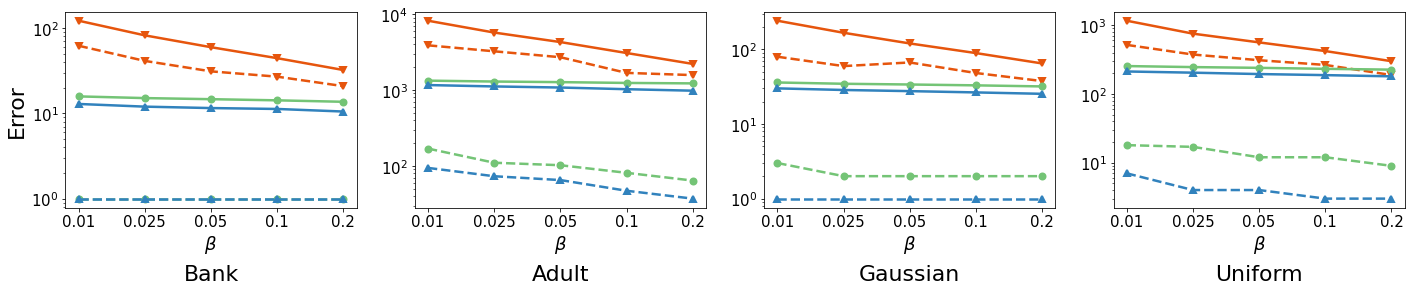

In [43]:
fig, axes = plt.subplots(1,4, figsize=(24, 3.6))


axes[0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0].plot(beta, SS_len_beta,linewidth = 2.5, linestyle = '-',label='SS CI',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))
line2, =axes[0].plot(beta, SS_err_beta,linewidth = 2.5, linestyle = '--',label='SS Error',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

line3, =axes[0].plot(beta, SVT_len_beta,linewidth = 2.5, linestyle = '-',label='SVT CI',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(9),
    markeredgecolor=plt.cm.tab20c(9),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(9))
line4, =axes[0].plot(beta, SVT_err_beta,linewidth = 2.5, linestyle = '--',label='SVT Error',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(9),
    markeredgecolor=plt.cm.tab20c(9),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(9))

line5, =axes[0].plot(beta, EM_len_beta,linewidth = 2.5, linestyle = '-',label='EM CI',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line6, =axes[0].plot(beta, EM_err_beta,linewidth = 2.5, linestyle = '--',label='EM Error',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))


axes[0].set_ylabel('Error',fontsize=22)
axes[0].set_yscale('log')
#axes[0][0].legend(handles=[line1, line2, line3, line4, line5, line6],bbox_to_anchor=(-0.16, 0.52, 1, 1),fontsize=19,ncol=3, facecolor="white")

axes[1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1].plot(beta, SS_adult_len_b,linewidth = 2.5, linestyle = '-',label='SS CI',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))
line2, =axes[1].plot(beta, SS_adult_err_b,linewidth = 2.5, linestyle = '--',label='SS Error',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

line3, =axes[1].plot(beta, SVT_adult_len_b,linewidth = 2.5, linestyle = '-',label='SVT CI',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(9),
    markeredgecolor=plt.cm.tab20c(9),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(9))
line4, =axes[1].plot(beta, SVT_adult_err_b,linewidth = 2.5, linestyle = '--',label='SVT Error',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(9),
    markeredgecolor=plt.cm.tab20c(9),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(9))

line5, =axes[1].plot(beta, EM_adult_len_b,linewidth = 2.5, linestyle = '-',label='EM CI',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line6, =axes[1].plot(beta, EM_adult_err_b,linewidth = 2.5, linestyle = '--',label='EM Error',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))


#axes[1].set_ylabel('Error(Adult)',fontsize=22)
axes[1].set_yscale('log')

axes[2].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[2].plot(beta, SS_len_norm_b,linewidth = 2.5, linestyle = '-',label='SS CI',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))
line2, =axes[2].plot(beta, SS_err_norm_b,linewidth = 2.5, linestyle = '--',label='SS Error',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

line3, =axes[2].plot(beta, SVT_len_norm_b,linewidth = 2.5, linestyle = '-',label='SVT CI',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(9),
    markeredgecolor=plt.cm.tab20c(9),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(9))
line4, =axes[2].plot(beta, SVT_err_norm_b,linewidth = 2.5, linestyle = '--',label='SVT Error',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(9),
    markeredgecolor=plt.cm.tab20c(9),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(9))

line5, =axes[2].plot(beta, EM_len_norm_b,linewidth = 2.5, linestyle = '-',label='EM CI',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line6, =axes[2].plot(beta, EM_err_norm_b,linewidth = 2.5, linestyle = '--',label='EM Error',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))


#axes[2].set_ylabel('Error(Gaussian)',fontsize=22)
axes[2].set_yscale('log')


axes[3].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[3].plot(beta, SS_len_uni_b,linewidth = 2.5, linestyle = '-',label='SS CI',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))
line2, =axes[3].plot(beta, SS_err_uni_b,linewidth = 2.5, linestyle = '--',label='SS Error',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

line3, =axes[3].plot(beta, SVT_len_uni_b,linewidth = 2.5, linestyle = '-',label='SVT CI',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(9),
    markeredgecolor=plt.cm.tab20c(9),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(9))
line4, =axes[3].plot(beta, SVT_err_uni_b,linewidth = 2.5, linestyle = '--',label='SVT Error',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(9),
    markeredgecolor=plt.cm.tab20c(9),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(9))

line5, =axes[3].plot(beta, EM_len_uni_b,linewidth = 2.5, linestyle = '-',label='EM CI',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line6, =axes[3].plot(beta, EM_err_uni_b,linewidth = 2.5, linestyle = '--',label='EM Error',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))


#axes[3].set_ylabel('Error(Uniform)',fontsize=22)
axes[3].set_yscale('log')

axes[0].set_xlabel('$β$ ', fontsize=18)
axes[1].set_xlabel('$β$ ', fontsize=18)
axes[2].set_xlabel('$β$ ', fontsize=18)
axes[3].set_xlabel('$β$', fontsize=18)

axes[0].set_title('Bank', y=-0.4, fontsize=22)
axes[1].set_title('Adult', y=-0.4, fontsize=22)
axes[2].set_title('Gaussian', y=-0.4, fontsize=22)
axes[3].set_title('Uniform', y=-0.4, fontsize=22)

plt.savefig("./Beta.pdf", bbox_inches='tight')

In [31]:
triangle_result = 20150994
star_result = 7661801994

EM_triangle_len_eps = [6097125.36, 2272130.35, 940489.13, 418626.855, 196978.905, 94782.57]
EM_triangle_err_eps = [50496, 25565, 12444, 6310, 3394, 2128]
EM_star_len_eps = [11899865400.8, 3329005541.52, 885221915.34, 298747204.725, 120435401.92, 53801229.85]
EM_star_err_eps = [34538598, 13206588, 6070286, 4196135, 1860353, 1214766]

SS_triangle_len_eps = [534897.7433440697, 265288.102535291, 132765.481893246, 64655.537090658145, 32982.35555522298, 16588.753622431315]
SS_triangle_err_eps = [262014.6342451349, 164273.80160166696, 75066.0052517578, 41885.92384934798, 19940.42332853377, 11020.373477775604]
SS_star_len_eps = [284801896.6301407, 145671334.8413616, 71702753.27963051, 34559295.74812584, 17761927.01837146, 8929660.412992274]
SS_star_err_eps = [157134730.65325165, 70072678.4970808, 43236124.28113365, 22630117.23309803, 10277127.243614197, 4223257.590808868]

EM_triangle_len_beta = [454042.885, 438675.205, 429776.99, 417123.88, 409254.13]
EM_triangle_err_beta = [29569, 11220, 7303, 7002, 4059]
EM_star_len_beta = [331013207.61, 318923307.0, 308837047.06, 297421979.065, 289789878.14]
EM_star_err_beta = [9884773, 5354656, 5062701, 3973429, 2723786]

SS_triangle_len_beta = [181916.53215574482, 120545.22012717661, 90484.39800999529, 64794.77330619256, 47687.28576404183]
SS_triangle_err_beta = [97227.01082611084, 60550.5799741745, 59752.79151439667, 38183.88267993927, 28205.803005218506]
SS_star_len_beta = [98561381.83581401, 64969320.12523682, 48984432.52857647, 35708078.91898815, 25771685.817227174]
SS_star_err_beta = [33491629.10896015, 38208132.832312584, 29315066.983156204, 21872352.085733414, 15785557.563696861]

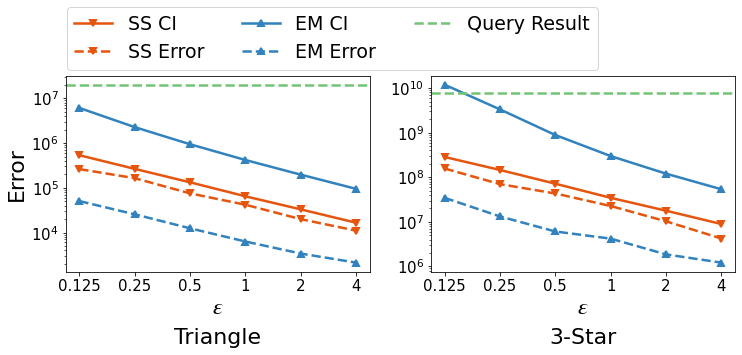

In [44]:
fig, axes = plt.subplots(1,2, figsize=(12, 3.6))

axes[0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0].plot(eps, SS_triangle_len_eps,linewidth = 2.5, linestyle = '-',label='SS CI',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))
line2, =axes[0].plot(eps, SS_triangle_err_eps,linewidth = 2.5, linestyle = '--',label='SS Error',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

line3, =axes[0].plot(eps, EM_triangle_len_eps,linewidth = 2.5, linestyle = '-',label='EM CI',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line4, =axes[0].plot(eps, EM_triangle_err_eps,linewidth = 2.5, linestyle = '--',label='EM Error',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))

line5=axes[0].axhline(y=triangle_result,linewidth = 2.5, linestyle = '--',label='Query Result',color=plt.cm.tab20c(9))


axes[0].set_ylabel('Error',fontsize=22)
axes[0].set_yscale('log')
axes[0].legend(handles=[line1, line2, line3, line4, line5],bbox_to_anchor=(0.78, 0.4, 1, 1),fontsize=19,ncol=3, facecolor="white")


axes[1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1].plot(eps, SS_star_len_eps,linewidth = 2.5, linestyle = '-',label='SS CI',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))
line2, =axes[1].plot(eps, SS_star_err_eps,linewidth = 2.5, linestyle = '--',label='SS Error',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

line3, =axes[1].plot(eps, EM_star_len_eps,linewidth = 2.5, linestyle = '-',label='EM CI',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line4, =axes[1].plot(eps, EM_star_err_eps,linewidth = 2.5, linestyle = '--',label='EM Error',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))

line5=axes[1].axhline(y=star_result,linewidth = 2.5, linestyle = '--',label='Query Result',color=plt.cm.tab20c(9))


#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1].set_yscale('log')

axes[0].set_xlabel('$𝜀$', fontsize=22)
axes[1].set_xlabel('$𝜀$', fontsize=22)
axes[0].set_title('Triangle', y=-0.4, fontsize=22)
axes[1].set_title('3-Star', y=-0.4, fontsize=22)


plt.savefig("./Graph_Eps.pdf", bbox_inches='tight')

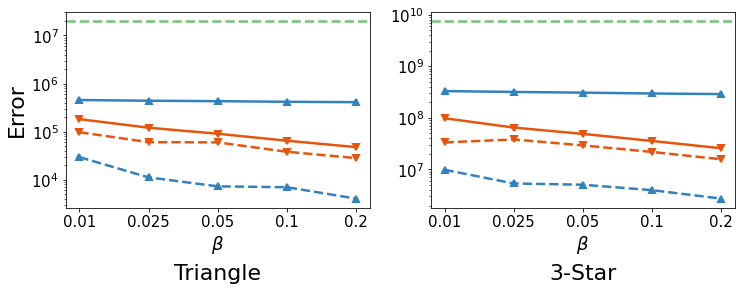

In [45]:
fig, axes = plt.subplots(1,2, figsize=(12, 3.6))

axes[0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0].plot(beta, SS_triangle_len_beta,linewidth = 2.5, linestyle = '-',label='SS CI',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))
line2, =axes[0].plot(beta, SS_triangle_err_beta,linewidth = 2.5, linestyle = '--',label='SS Error',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

line3, =axes[0].plot(beta, EM_triangle_len_beta,linewidth = 2.5, linestyle = '-',label='EM CI',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line4, =axes[0].plot(beta, EM_triangle_err_beta,linewidth = 2.5, linestyle = '--',label='EM Error',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))

line5=axes[0].axhline(y=triangle_result,linewidth = 2.5, linestyle = '--',label='Query Result',color=plt.cm.tab20c(9))


axes[0].set_ylabel('Error',fontsize=22)
axes[0].set_yscale('log')
#axes[0].legend(handles=[line1, line2, line3, line4, line5],bbox_to_anchor=(-0.11, 0.52, 1, 1),fontsize=19,ncol=3, facecolor="white")


axes[1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1].plot(beta, SS_star_len_beta,linewidth = 2.5, linestyle = '-',label='SS CI',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))
line2, =axes[1].plot(beta, SS_star_err_beta,linewidth = 2.5, linestyle = '--',label='SS Error',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

line3, =axes[1].plot(beta, EM_star_len_beta,linewidth = 2.5, linestyle = '-',label='EM CI',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line4, =axes[1].plot(beta, EM_star_err_beta,linewidth = 2.5, linestyle = '--',label='EM Error',
    marker = '^',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))

line5=axes[1].axhline(y=star_result,linewidth = 2.5, linestyle = '--',label='Query Result',color=plt.cm.tab20c(9))


#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1].set_yscale('log')

axes[0].set_xlabel('$β$ ', fontsize=18)
axes[1].set_xlabel('$β $', fontsize=18)
axes[0].set_title('Triangle', y=-0.4, fontsize=22)
axes[1].set_title('3-Star', y=-0.4, fontsize=22)


plt.savefig("./Graph_Beta.pdf", bbox_inches='tight')